In [78]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/isaacGGomez/Ing_Caract/master/dist.data",sep = ",")
data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,y
0,15.310142,NaN,8.436759,3.723421,Dec,NaN,1.319733,21.408846
1,11.841750,1.558534,-4.776643,4.304625,Dec,MB,7.129585,0.273072
2,4.343978,NaN,NaN,4.540588,NaN,MM,NaN,19.010811
3,NaN,2.428672,9.003936,4.456992,NaN,MA,NaN,13.564040
4,14.892188,NaN,8.468824,1.070600,NaN,B,3.369261,25.493163


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     484 non-null    float64
 1   x_2     265 non-null    float64
 2   x_3     464 non-null    float64
 3   x_4     507 non-null    float64
 4   x_5     377 non-null    object 
 5   x_6     358 non-null    object 
 6   x_7     155 non-null    float64
 7   y       518 non-null    float64
dtypes: float64(6), object(2)
memory usage: 33.1+ KB


In [80]:
dataNA = data.isna()
dataNA.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,y
0,False,True,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False
2,False,True,True,False,True,False,True,False
3,True,False,False,False,True,False,True,False
4,False,True,False,False,True,False,False,False


In [81]:
GroupNA = dataNA.sum()

In [82]:
sizedf = len(dataNA)

In [83]:
(GroupNA/sizedf)*100

x_1     8.333333
x_2    49.810606
x_3    12.121212
x_4     3.977273
x_5    28.598485
x_6    32.196970
x_7    70.643939
y       1.893939
dtype: float64

In [84]:
finaldf = data.drop(axis=1,columns='x_7')
finaldf.head()

,x_1,x_2,x_3,x_4,x_5,x_6,y
0,15.310142,NaN,8.436759,3.723421,Dec,NaN,21.408846
1,11.841750,1.558534,-4.776643,4.304625,Dec,MB,0.273072
2,4.343978,NaN,NaN,4.540588,NaN,MM,19.010811
3,NaN,2.428672,9.003936,4.456992,NaN,MA,13.564040
4,14.892188,NaN,8.468824,1.070600,NaN,B,25.493163


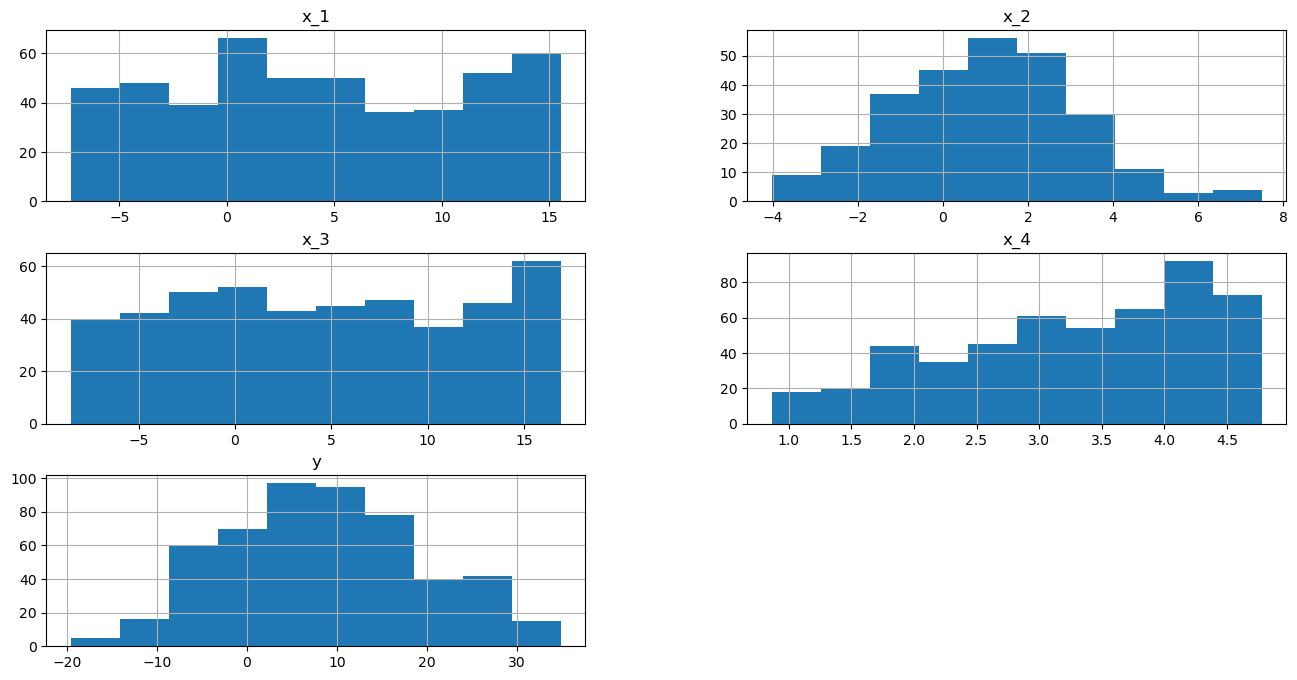

In [85]:
plots = finaldf.hist(figsize=(16,8))

<AxesSubplot:>

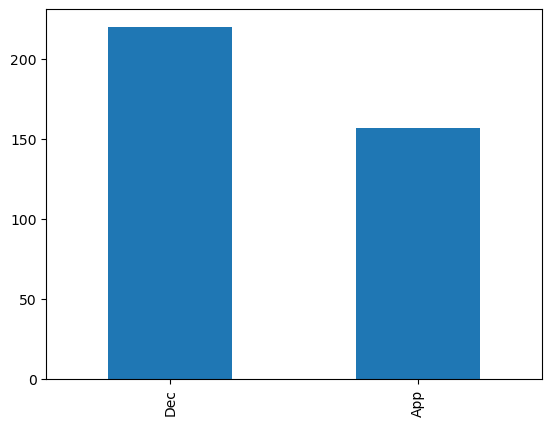

In [86]:
data['x_5'].value_counts().plot(kind='bar')

<AxesSubplot:>

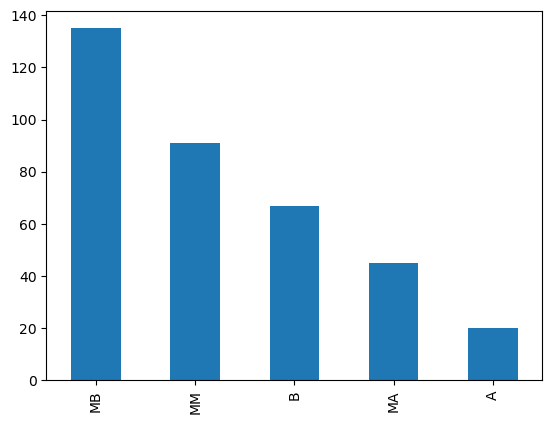

In [87]:
data['x_6'].value_counts().plot(kind='bar')

Las sustituciones se realizaran de la siguiente manera
x_1: Imputacion mediante sustitucion aleatoria
x_2: Imputacion mediante la media
x_3: Imputacion mediante sustitucion aleatoria
x_4: Imputacion mediante la mediana
x_6: Imputacion mediante la moda
x_7: Imputacion mediante la moda
y = Imputacion mediante la media




In [88]:
data.kurt()

C:\Users\Isaac Gomez\AppData\Local\Temp\ipykernel_18304\3075447224.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()


x_1   -1.216049
x_2   -0.081620
x_3   -1.217412
x_4   -0.823828
x_7   -0.388848
y     -0.508963
dtype: float64

In [89]:
finaldf.skew()

C:\Users\Isaac Gomez\AppData\Local\Temp\ipykernel_18304\1325481610.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  finaldf.skew()


x_1    0.045977
x_2    0.196266
x_3    0.012478
x_4   -0.478714
y      0.130844
dtype: float64

In [90]:
m = finaldf[['x_2','y']].mean()
m

x_2    0.951598
y      8.653641
dtype: float64

In [91]:
finaldf[['x_2','y']] = finaldf[['x_2','y']].fillna(m)
finaldf.isna().sum()

x_1     44
x_2      0
x_3     64
x_4     21
x_5    151
x_6    170
y        0
dtype: int64

In [92]:
finaldf

,x_1,x_2,x_3,x_4,x_5,x_6,y
0,15.310142,0.951598,8.436759,3.723421,Dec,NaN,21.408846
1,11.841750,1.558534,-4.776643,4.304625,Dec,MB,0.273072
2,4.343978,0.951598,NaN,4.540588,NaN,MM,19.010811
3,NaN,2.428672,9.003936,4.456992,NaN,MA,13.564040
4,14.892188,0.951598,8.468824,1.070600,NaN,B,25.493163
...,...,...,...,...,...,...,...
523,10.844312,0.951598,1.653327,4.249280,Dec,MM,7.833448
524,12.346405,0.951598,1.041838,3.406081,Dec,MB,10.452970
525,1.496831,3.115300,9.288658,4.547431,App,MM,9.310863
526,NaN,0.951598,12.267643,2.867885,App,MA,27.283751


In [95]:
mod = finaldf[['x_5','x_6']].mode().iloc[0]
mod

IndexError: single positional indexer is out-of-bounds

In [94]:
finaldf[['x_5','x_6']] = finaldf[['x_5','x_6']].fillna(mod,inplace=True)
finaldf.isna().sum()

C:\Users\Isaac Gomez\AppData\Local\Temp\ipykernel_18304\2868578480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf[['x_5','x_6']] = finaldf[['x_5','x_6']].fillna(mod,inplace=True)


x_1     44
x_2      0
x_3     64
x_4     21
x_5    528
x_6    528
y        0
dtype: int64

In [73]:
data.isna().sum()

x_1     44
x_2    263
x_3     64
x_4     21
x_5    151
x_6    170
x_7    373
y       10
dtype: int64